In [1]:
import numpy as np
import matplotlib.pyplot as plot
import pandas as pd
import datetime as dt

In [2]:
trips=pd.read_csv("trip.csv")
#trips=trips_all.loc[trips_all.start_date.str.contains('4/'+'\S'+'/2014')]
trips.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


In [3]:
trips['start_date'] = pd.to_datetime((trips['start_date']))
trips['dayofweek'] = trips.start_date.dt.dayofweek #nro 5 es sabado, 6 es domingo
trips.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,dayofweek
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127,3
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138,3
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214,3
3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060,3
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103,3


In [4]:
viajes_total=trips['id'].count()

trips_lunes= trips[(trips['dayofweek']==0)]['id'].count()
trips_martes= trips[(trips['dayofweek']==1)]['id'].count()
trips_miercoles= trips[(trips['dayofweek']==2)]['id'].count()
trips_jueves= trips[(trips['dayofweek']==3)]['id'].count()
trips_viernes= trips[(trips['dayofweek']==4)]['id'].count()
trips_sabado= trips[(trips['dayofweek']==5)]['id'].count()
trips_domingo= trips[(trips['dayofweek']==6)]['id'].count()

In [5]:
#porcentajes
porcentaje_lunes = trips_lunes*100/viajes_total
porcentaje_martes = trips_martes*100/viajes_total
porcentaje_miercoles = trips_miercoles*100/viajes_total
porcentaje_jueves = trips_jueves*100/viajes_total
porcentaje_viernes = trips_viernes*100/viajes_total
porcentaje_sabado = trips_sabado*100/viajes_total
porcentaje_domingo = trips_domingo*100/viajes_total



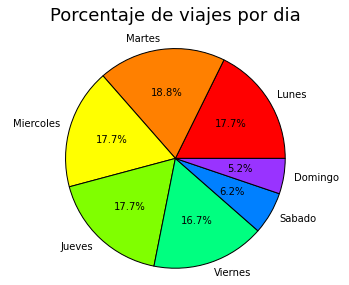

In [7]:
%matplotlib inline
viajes = [porcentaje_lunes,porcentaje_martes,porcentaje_miercoles,porcentaje_jueves,porcentaje_viernes,porcentaje_sabado,porcentaje_domingo] # Definimos un vector con el % de visitas del top ten de países
#visitas = np.append(visitas, 100. - np.sum(visitas)) # Introducimos un último elemento que recoge el % de visitas de otros países fuera del top ten
dias = ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo']  # Etiquetas para los quesitos
#explode = [0, 0, 0, 0, 0, 0, 0, 0.2, 0.2, 0, 0]  # Esto nos ayudará a destacar algunos quesitos
n=len(dias)
plot.pie(viajes, labels = dias,autopct='%1.1f%%', colors=['#FF0000', '#FF8000','#FFFF00','#80FF00','#00FF80','#0080FF','#9933FF'])  # Dibuja un gráfico de quesitos
#plot.pie(viajes, labels = dias,autopct='%1.1f%%',colors = ['%f' % (i/float(n)) for i in range(n)])
plot.title('Porcentaje de viajes por dia\n', fontsize = 18)
plot.axis('equal')
plot.show()